### Библиотеки / данные

импортируем numpy и pandas

In [1]:
import numpy as np
import pandas as pd

import matplotlib

задаем некоторые настройки pandas, регулирующие формат вывода

In [22]:
pd.options.display.max_rows = 10

- считываем данные 
- используем столбец Symbol в качестве индекса 
- считываем только те столбцы ['Symbol', 'Sector', 'Price', 'Book Value']

| Column Name        | Description
| ------------- |:-------------:|
|Symbol|Сокращенное название организации|
|Name|Полное название организации|
|Sector|Сектор экономики|
|Price|Стоимость акции|
|Dividend Yield|Дивидендная доходность|
|Price/Earnings|Цена / прибыль|
|Earnings/Share|Прибыль на акцию|
|Book Value|Балансовая стоимость компании|
|52 week low|52-недельный минимум|
|52 week high|52-недельный максимум|
|Market Cap|Рыночная капитализация|
|EBITDA|**E**arnings **b**efore **i**nterest, **t**axes, **d**epreciation and **a**mortization|
|Price/Sales|Цена / объём продаж|
|Price/Book|Цена / балансовая стоимость|
|SEC Filings|Ссылка *sec.gov*|

In [23]:
sp500 = pd.read_csv("../data/sp500.csv",
                    index_col='Symbol',
                    usecols=['Symbol', 'Sector', 'Price', 'Book Value'])

In [24]:
sp500.head()

,Sector,Price,Book Value
Symbol,,,
MMM,Industrials,141.14,26.668
ABT,Health Care,39.60,15.573
ABBV,Health Care,53.95,2.954
ACN,Information Technology,79.79,8.326
ACE,Financials,102.91,86.897


считываем исторические данные о котировках акций

In [25]:
omh = pd.read_csv('../data/omh.csv', 
                  parse_dates=['Date'])

omh.set_index('Date', 
              inplace=True)

In [26]:
omh.head()

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00


### Сводка статистик

получаем сводку статистик для датафрейма, с которой работаем как с обычным датафреймом

In [27]:
sp500.describe()

,Price,Book Value
count,500.00000,499.000000
mean,77.36860,301.611301
std,87.59694,6195.727862
min,0.00000,-51.275000
25%,38.74500,10.836500
50%,58.35500,19.098000
75%,86.68000,31.386500
max,1197.12000,138425.453100


вычисляем сводку статистик для отдельного столбца Price

In [28]:
sp500.Price.describe()

count     500.00000
mean       77.36860
std        87.59694
min         0.00000
25%        38.74500
50%        58.35500
75%        86.68000
max      1197.12000
Name: Price, dtype: float64

получаем сводку статистик для нечисловых данных

In [29]:
sp500.Sector.describe()

count                        500
unique                        13
top       Consumer Discretionary
freq                          85
Name: Sector, dtype: object

метод info:

In [30]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, MMM to ZTS
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sector      500 non-null    object 
 1   Price       500 non-null    float64
 2   Book Value  499 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.6+ KB


получаем сводную статистику для нечисловых данных

In [31]:
sp500.Sector.value_counts(normalize=True)

Consumer Discretionary         0.170
Financials                     0.164
Industrials                    0.128
Information Technology         0.128
Health Care                    0.108
                               ...  
Materials                      0.058
Telecommunications Services    0.012
Consumer Staples               0.002
Industries                     0.002
Consumer Discretionary         0.002
Name: Sector, Length: 13, dtype: float64

### Арифметические операции

- задаем стартовое значение генератора случайных чисел для получения воспроизводимых результатов
- создаем объект DataFrame

In [32]:
np.random.seed(123)
df = pd.DataFrame(np.random.randn(5, 4), 
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


умножаем все на 2, берём только абсолютные значения

In [33]:
abs(df * 2)

,A,B,C,D
0,2.171261,1.994691,0.565957,3.012589
1,1.157201,3.302873,4.853358,0.857825
2,2.531873,1.733481,1.357772,0.189418
3,2.982779,1.277804,0.887964,0.868703
4,4.411860,4.373572,2.008108,0.772373


вычитаем первую строку из каждой строки объекта DataFrame

In [34]:
df

,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


In [35]:
df.iloc[0]

A   -1.085631
B    0.997345
C    0.282978
D   -1.506295
Name: 0, dtype: float64

In [36]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,0.507030,0.654091,-2.709658,1.077382
2,2.351567,-1.864086,-0.961865,1.411586
3,2.577020,-1.636247,-0.726960,1.071943
4,3.291561,1.189441,0.721075,1.892481


вычитаем объект DataFrame из объекта Series

In [37]:
df.iloc[0] - df

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.507030,-0.654091,2.709658,-1.077382
2,-2.351567,1.864086,0.961865,-1.411586
3,-2.577020,1.636247,0.726960,-1.071943
4,-3.291561,-1.189441,-0.721075,-1.892481


- возьмём второе и третье поле 1-ой строки:
- добавляем столбец E
- смотрим, как применяется выравнивание в этой математической операции

In [38]:
df

,A,B,C,D
0,-1.085631,0.997345,0.282978,-1.506295
1,-0.578600,1.651437,-2.426679,-0.428913
2,1.265936,-0.866740,-0.678886,-0.094709
3,1.491390,-0.638902,-0.443982,-0.434351
4,2.205930,2.186786,1.004054,0.386186


In [39]:
s = df.iloc[0][1:3]
s['E'] = 0
s

B    0.997345
C    0.282978
E    0.000000
Name: 0, dtype: float64

In [40]:
df + s

,A,B,C,D,E
0,NaN,1.994691,0.565957,NaN,NaN
1,NaN,2.648782,-2.143701,NaN,NaN
2,NaN,0.130605,-0.395908,NaN,NaN
3,NaN,0.358443,-0.161003,NaN,NaN
4,NaN,3.184132,1.287032,NaN,NaN


извлекаем строки в позициях с 1-й по 3-ю и только столбцы B и C <br>
по сути - извлекаем небольшой квадрат из середины df

In [41]:
subframe = df[1:4][['B', 'C']].copy()
subframe

,B,C
1,1.651437,-2.426679
2,-0.866740,-0.678886
3,-0.638902,-0.443982


демонстрируем, как происходит выравнивание при выполнении операции вычитания

In [42]:
df - subframe

,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,0.0,0.0,NaN
2,NaN,0.0,0.0,NaN
3,NaN,0.0,0.0,NaN
4,NaN,NaN,NaN,NaN


извлекаем столбец A и вычитаем его из нашего датафрейма

In [43]:
df.sub(df['A'], axis=0)

,A,B,C,D
0,0.0,2.082976,1.368609,-0.420664
1,0.0,2.230037,-1.848079,0.149688
2,0.0,-2.132677,-1.944822,-1.360645
3,0.0,-2.130292,-1.935372,-1.925741
4,0.0,-0.019144,-1.201876,-1.819744


### Одномерные статистики

#### минимум / максимум

определяем максимальную цену для обеих акций

In [44]:
omh[['MSFT', 'AAPL']]

,MSFT,AAPL
Date,,
2014-12-01,48.62,115.07
2014-12-02,48.46,114.63
2014-12-03,48.08,115.93
2014-12-04,48.84,115.49
2014-12-05,48.42,115.00
...,...,...
2014-12-24,48.14,112.01
2014-12-26,47.88,113.99
2014-12-29,47.45,113.91


In [45]:
omh[['MSFT', 'AAPL']].min()

MSFT     45.16
AAPL    106.75
dtype: float64

определяем индекс, которому соответствует максимальная цена для обеих акций

In [46]:
omh[['MSFT', 'AAPL']].idxmin()

MSFT   2014-12-16
AAPL   2014-12-16
dtype: datetime64[ns]

#### cреднее значение / медиана / мода

<img src='..\images\moda-mediana.jpg'/>

вычисляем среднее значение для всех столбцов в датафрейме omh

In [47]:
omh.mean()

MSFT     47.493182
AAPL    112.411364
dtype: float64

вычисляем значение, усредненное по всем столбцам, для каждой строки (выведем первые 5)

In [48]:
omh.mean(axis=1).head() 

Date
2014-12-01    81.845
2014-12-02    81.545
2014-12-03    82.005
2014-12-04    82.165
2014-12-05    81.710
dtype: float64

вычисляем медиану значений для каждого столбца

In [49]:
omh.median()

MSFT     47.625
AAPL    112.530
dtype: float64

вычисляем моду для столбца Sector

In [50]:
sp500.Sector.mode()

0    Consumer Discretionary
Name: Sector, dtype: object

мод может быть несколько, поэтому результат операции - Series 

In [51]:
s = pd.Series([1, 2, 3, 3, 5, 1])
s.mode()

0    1
1    3
dtype: int64

#### [дисперсия](https://ru.wikipedia.org/wiki/Дисперсия_случайной_величины) / среднеквадратичное отклонение

вычисляем дисперсию значений в каждом столбце

In [52]:
omh.var()

MSFT    0.870632
AAPL    5.706231
dtype: float64

In [53]:
omh.shape

(22, 2)

In [54]:
(omh.MSFT**2 - omh.MSFT.mean()**2).sum() / (omh.shape[0]-1)

0.8706322510824867

вычисляем среднеквадратичное отклонение

In [55]:
omh.std()

MSFT    0.933077
AAPL    2.388772
dtype: float64

In [56]:
omh.MSFT.var()**0.5

0.9330767659106356

#### [ковариация](https://ru.wikipedia.org/wiki/Ковариация) / [корреляция](https://ru.wikipedia.org/wiki/Корреляция)

вычисляем ковариацию между MSFT и AAPL

In [57]:
omh.MSFT.cov(omh.AAPL)

1.9261240259740264

вычисляем корреляцию между MSFT и AAPL

In [58]:
omh.MSFT.corr(omh.AAPL)

0.8641560684381171

In [59]:
omh.MSFT.cov(omh.AAPL) / (omh.MSFT.std() * omh.AAPL.std())

0.8641560684381169

либо можем получать матрицу ковариаций

In [60]:
omh.corr()

,MSFT,AAPL
MSFT,1.000000,0.864156
AAPL,0.864156,1.000000


### Преобразование данных 

#### дискретизация и квантилизация

генерируем 10000 случайных чисел из стандартного нормального распределения

In [61]:
np.random.seed(123456)
dist = np.random.normal(size = 10000)
dist

array([ 0.4691123 , -0.28286334, -1.5090585 , ...,  0.26296448,
       -0.83377412, -0.10418135])

выводим среднее и стандартное отклонение

In [62]:
(dist.mean(), dist.std())

(-0.002863324040906651, 1.008716203199891)

разбиваем на пять одинаковых по размеру групп (по размеру интервалов - не количеству наблюдений в группе!)

In [63]:
bins = pd.cut(dist, 5)
bins

[(-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-2.077, -0.633], (0.81, 2.254], ..., (-2.077, -0.633], (-0.633, 0.81], (-0.633, 0.81], (-2.077, -0.633], (-0.633, 0.81]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.528, -2.077] < (-2.077, -0.633] < (-0.633, 0.81] < (0.81, 2.254] < (2.254, 3.698]]

In [64]:
for i in range(5):
    print(bins[i])

(-0.633, 0.81]
(-0.633, 0.81]
(-2.077, -0.633]
(-2.077, -0.633]
(0.81, 2.254]


In [66]:
type(bins)

pandas.core.arrays.categorical.Categorical

найдём длины соответствующих интервалов

In [67]:
bins.categories

IntervalIndex([(-3.528, -2.077], (-2.077, -0.633], (-0.633, 0.81], (0.81, 2.254], (2.254, 3.698]], dtype='interval[float64, right]')

In [68]:
[q.right - q.left for q in bins.categories]

[1.451, 1.444, 1.443, 1.444, 1.444]

генерируем 50 значений возраста в диапазоне от 6 до 70

In [69]:
np.random.seed(242)
ages = np.random.randint(6, 70, 50)
ages

array([20, 45,  8, 28, 53,  7, 12, 19, 66, 42, 10, 37, 34, 25, 44, 69, 34,
       67, 25, 51,  8, 50, 33, 42, 20, 31, 64, 51, 59, 11, 40, 32, 33, 29,
       28, 18, 16, 47, 45, 66, 43, 65, 16, 17, 69,  9, 19, 42, 33, 39])

добавляем имена для групп

In [70]:
ranges = [6, 12, 18, 35, 50, 70]
labels = ['Youth', 'Young Adult', 'Adult', 'Middle Aged', 'Retired persons']
agebins = pd.cut(ages, ranges, labels=labels)
agebins.describe()

,counts,freqs
categories,,
Youth,7,0.14
Young Adult,4,0.08
Adult,16,0.32
Middle Aged,12,0.24
Retired persons,11,0.22


разбиваем (используя квантили) на 5 групп с одинаковым количеством элементов

In [71]:
qbin = pd.qcut(dist, 5)

найдём статистику по полученным группам

In [72]:
qbin.describe()

,counts,freqs
categories,,
"(-3.522, -0.861]",2000,0.2
"(-0.861, -0.241]",2000,0.2
"(-0.241, 0.261]",2000,0.2
"(0.261, 0.866]",2000,0.2
"(0.866, 3.698]",2000,0.2


пример использования qcut:

In [73]:
sp500_copy = sp500.copy()
sp500_copy['Price_Group'], bins = pd.qcut(sp500_copy.Price, 
                                          5,
                                          labels=['group_'+str(i) for i in range(1, 6)],
                                          retbins=True)
sp500_copy.Price_Group

Symbol
MMM     group_5
ABT     group_2
ABBV    group_3
ACN     group_4
ACE     group_5
         ...   
YHOO    group_2
YUM     group_4
ZMH     group_5
ZION    group_1
ZTS     group_1
Name: Price_Group, Length: 500, dtype: category
Categories (5, object): ['group_1' < 'group_2' < 'group_3' < 'group_4' < 'group_5']

In [74]:
bins

array([   0.   ,   34.558,   50.732,   69.586,   97.032, 1197.12 ])

In [75]:
sp500_copy.Price_Group.value_counts()

group_1    100
group_2    100
group_3    100
group_4    100
group_5    100
Name: Price_Group, dtype: int64

#### кумулятивные суммы

вычисляем кумулятивную сумму

In [76]:
pd.Series([1, 2, 3, 4]).cumsum()

0     1
1     3
2     6
3    10
dtype: int64

вычисляем кумулятивное произведение

In [77]:
pd.Series([1, 2, 3, 4]).cumprod()

0     1
1     2
2     6
3    24
dtype: int64

#### ранжирование

для примера:

In [78]:
s = pd.Series([160, 165, 165, 170, 175], index=list('abcde'))
s

a    160
b    165
c    165
d    170
e    175
dtype: int64

ранжируем значения

In [79]:
s.rank()

a    1.0
b    2.5
c    2.5
d    4.0
e    5.0
dtype: float64

#### относительное изменение

In [80]:
omh[['MSFT']].head()

,MSFT
Date,
2014-12-01,48.62
2014-12-02,48.46
2014-12-03,48.08
2014-12-04,48.84
2014-12-05,48.42


вычисляем относительнон изменение для MSFT (текущее значение с предыдущим)

In [81]:
omh[['MSFT']].pct_change().head()

,MSFT
Date,
2014-12-01,NaN
2014-12-02,-0.003291
2014-12-03,-0.007842
2014-12-04,0.015807
2014-12-05,-0.008600


In [82]:
(48.46 - 48.62)/48.62

-0.003290826820238515

### Оконные функции

Объект Rolling:

In [83]:
r = omh.MSFT.rolling(3)

возможные операции:

In [84]:
r.

SyntaxError: invalid syntax (Temp/ipykernel_15488/1224273140.py, line 1)

скользящее среднее:

In [85]:
r.mean()

Date
2014-12-01          NaN
2014-12-02          NaN
2014-12-03    48.386667
2014-12-04    48.460000
2014-12-05    48.446667
                ...    
2014-12-24    48.190000
2014-12-26    48.156667
2014-12-29    47.823333
2014-12-30    47.450000
2014-12-31    46.973333
Name: MSFT, Length: 22, dtype: float64

первое значение:

In [86]:
omh.MSFT.loc['2014-12-01':'2014-12-03'].mean()

48.38666666666666

второе:

In [87]:
omh.MSFT.loc['2014-12-02':'2014-12-04'].mean()

48.46

7  Визуализация результатов

In [94]:
from scipy.stats import norm
# Creating the table of pdf of standard normal distribution
data = np.arange(-3,3.01,0.01)
pdf = norm.pdf(data , loc = 0 , scale = 1 )
####pdf

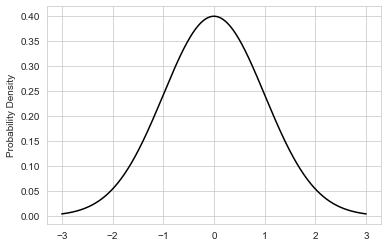

In [103]:
#Visualizing the distribution
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
plt.ylabel('Probability Density')
plt.plot(data, pdf , color = 'black')
plt.show()



In [124]:
####GENERATION DISTRIBUTION AND VISUALISATION
n=2022
np.random.seed(2092022)
# initializing random values
#X = np.random.rand(n)
# initializing normal values
X= np.random.normal(size = n)
(X.mean(),X.std())


(-0.007330308413786824, 1.0195666301667283)

<AxesSubplot:>

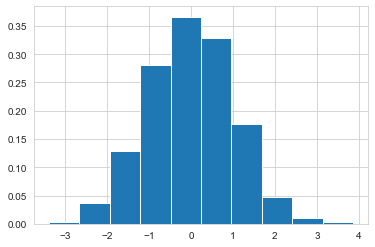

In [141]:
s=pd.Series(data=X)
s.hist(density=True)
####Generate Kernel Density Estimate plot using Gaussian kernels
#s.hist(density=False)
#s.plot(kind='kde', figsize=(6,8))


[-3.38879325 -2.66372786 -1.93866247 -1.21359708 -0.48853168  0.23653371
  0.9615991   1.68666449  2.41172988  3.13679528  3.86186067]


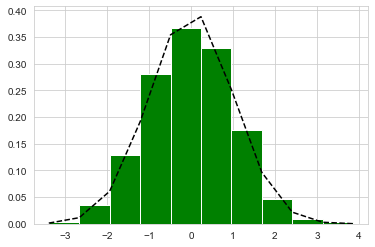

In [144]:
s=pd.Series(data=X)
num_bins=10
sigma=1
mu=0
n, bins, patches = plt.hist(X, num_bins, density = 1, color ='green')
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '--', color ='black')
#s.hist(density=False)
#s.plot(kind='kde', figsize=(10,8))
#s.plot(kind='kde', figsize=(10,6))
print(bins)

,X
0.25,-0.708202
0.50,0.014065
0.75,0.677301


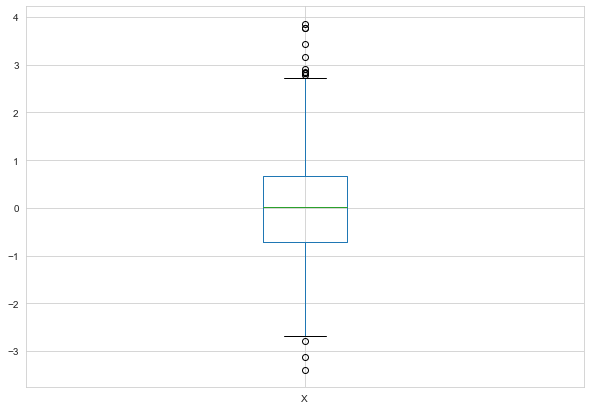

In [147]:
df = pd.DataFrame(data=s,columns=['X'])
#df
df.boxplot(figsize = (10, 7))
df.quantile([0.25,0.5,0.75])

In [148]:
df.min(),df.max()

(X   -3.388793
 dtype: float64,
 X    3.861861
 dtype: float64)

[  4  53 188 411 537 483 258  69  14   5]
2022
[-3.38879325 -2.66372786 -1.93866247 -1.21359708 -0.48853168  0.23653371
  0.9615991   1.68666449  2.41172988  3.13679528]
[-2.66372786 -1.93866247 -1.21359708 -0.48853168  0.23653371  0.9615991
  1.68666449  2.41172988  3.13679528  3.86186067]
[0.72506539 0.72506539 0.72506539 0.72506539 0.72506539 0.72506539
 0.72506539 0.72506539 0.72506539 0.72506539]


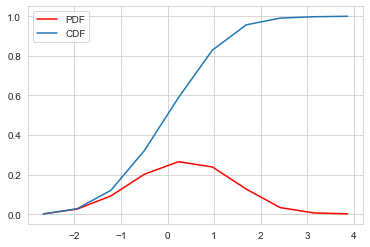

In [139]:
# getting data of the histogram
count, bins_count = np.histogram(X, bins=10)
print(count) 
print(sum(count))
left_bin =bins_count[0:10]
right_bin =bins_count[1:11] 
print(left_bin) 
print(right_bin)
shag=right_bin-left_bin
print(shag)
# finding the histogram  of frequencies using count values
pdf = count /sum(count) 
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
 
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()